TODO: test different target eccentricities

TODO: test different target speed

# 1. Generalized coordinates

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from decimal import Decimal

In [2]:
from PlotFunctions import plot_signal, plot_position, plot_velocity, plot_variance, all_plots
#%run PlotFunctions.py


## 1.1. Definition
For the linear models of the eye and arm, we consider a single-input single-output discrete-time system under control with the following state-update equation:
$$
\tilde{x}_{t+1} = A\tilde{x}_t+B\left (u_t+w_t \right)
$$  
where $\tilde{x}_t$ is the $n$-dimentional state at time $t$, $\tilde{x}_{t+1}$ is the $n$-dimentional state at time $t+dt$, $u_t$ the neural driving signal at time $t$, $w_t$ is a white noise with mean zero and variance $ku_t^2$, $A$ is a fixed $n \times n$ matrix and B is a $n \times 1$ vector both describing the dynamics of the system.

Here, A will be the following matrix:  

$$ A = 
\begin{bmatrix}
1 & dt & \frac{dt^2}{2} & \cdots & \frac{dt^n}{n!}\\
0 & 1 & dt & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \vdots\\
0 & 0 & 0 & 1 & dt \\
0 & \cdots & \cdots & \cdots & 1-\frac{dt}{\tau}
\end{bmatrix}
\textbf{ }\textbf{ }\textbf{ }\textbf{ }and\textbf{ }\textbf{ }\textbf{ }\textbf{ }
B = \begin{bmatrix} 0 \\ 0 \\ \vdots \\ 0 \\ dt\end{bmatrix}
$$  
  
We choose this matrix since, according to the Taylor's formula:  
$ x\left (t+dt \right) = x\left (t \right) + dt\times \dot{x}\left (t \right) + \frac{dt^2}{2}\times \ddot{x}\left (t \right)+ \dots + \frac{dt^n}{n!}\times x^{(n)}\left (t \right) + \mathcal{o}\left(dt^n\right)
$
and  
$x^{(n)}\left (t+dt \right) = \left ( 1 - \frac{dt}{\tau} \right)x^{(n)}\left (t \right) + dt\left (u \left (t\right) + w\left (t\right) \right)
$

In [3]:
mvc

#def fact(n): 
#    """The factorial function
#    Returns n!, that is n x (n-1) x (n-2) x ... x 1
#    Recursive implementation
#    """
#    if n == 0:
#        return 1
#    else:
#        return(n*fact(n-1))

In [4]:
tau = 0.013
dt = 0.001 # step time
n = 2 # number of coordinates
k = 0.01 # kind of accuracy parameter: the smaller k is, the more accurate is the pointing

In [5]:
# definition of A and B

A = np.zeros((n,n))
B = np.zeros(n)

for i in np.arange(n):
    for j in np.arange(i,n):
        A[i,j] = dt**(j-i)/mvc.fact(j-i)
A[n-1, n-1] = 1-dt/tau
B[n-1] = dt

In [6]:
target = np.array([1,5,10,15,20,25,30,35,40])
t_Tv = 0.03+0.002*5+0*target#0.02468+0.001739*target # see Transitioning from Saccade to SPEM using LQTC, Korentis & Enderle

In [7]:
t_Tv

array([ 0.04,  0.04,  0.04,  0.04,  0.04,  0.04,  0.04,  0.04,  0.04])

In [8]:
t_Tv = np.array([0.033,  0.042 ,  0.051,  0.059 ,  0.068,  0.077 , 0.086,  0.094 ])

In [9]:
t_T =  float(round(Decimal(t_Tv[0]),3)) #.05 # saccade duration
t_R =  .1-float(round(Decimal(t_Tv[0]),3)) # .05 # fixing / pursuit duration
T = int(np.round(t_T/dt))
R = int(np.round(t_R/dt))
time = np.linspace(0, t_T+t_R, R+T+1)
time_ms = time*1000
x0 = np.zeros(n) # starting point
xT = np.zeros(n) # ending point
xT[0] = 0.5
x0[0] = 0
x0[1] = 5
v = 10
#v = 10*np.cos(20*np.pi*time) # velocity of the target (deg/s)


In [10]:
def xT_f(t):
#    return np.array([40+10/np.pi*np.cos(2*np.pi*t*dt), -20*np.sin(2*np.pi*t*dt)])
    return np.array([target[0]+v*t*dt,v])

In [11]:
xx = np.zeros(T+R+1)
vv = np.zeros(T+R+1)
for i in np.arange(T+R+1):
    xx[i] = xT_f(i)[0]
    vv[i] = xT_f(i)[1]
print(xx)

[ 1.    1.01  1.02  1.03  1.04  1.05  1.06  1.07  1.08  1.09  1.1   1.11
  1.12  1.13  1.14  1.15  1.16  1.17  1.18  1.19  1.2   1.21  1.22  1.23
  1.24  1.25  1.26  1.27  1.28  1.29  1.3   1.31  1.32  1.33  1.34  1.35
  1.36  1.37  1.38  1.39  1.4   1.41  1.42  1.43  1.44  1.45  1.46  1.47
  1.48  1.49  1.5   1.51  1.52  1.53  1.54  1.55  1.56  1.57  1.58  1.59
  1.6   1.61  1.62  1.63  1.64  1.65  1.66  1.67  1.68  1.69  1.7   1.71
  1.72  1.73  1.74  1.75  1.76  1.77  1.78  1.79  1.8   1.81  1.82  1.83
  1.84  1.85  1.86  1.87  1.88  1.89  1.9   1.91  1.92  1.93  1.94  1.95
  1.96  1.97  1.98  1.99  2.  ]


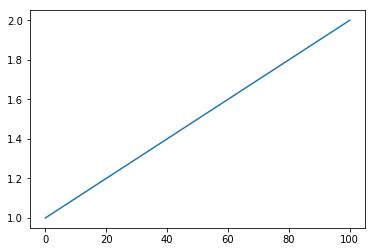

In [12]:
plt.plot(xx)

## 1.2. Mean and covariance matrix
$\tilde{x}_t = A\tilde{x}_{t-1}+B\left (u_{t-1}+w_{t-1} \right) \\
\tilde{x}_t = A \left (A\tilde{x}_{t-2}+B\left (u_{t-2}+w_{t-2} \right)\right) + B\left (u_{t-1}+w_{t-1} \right) \\
...\\
\tilde{x}_t = A^t \tilde{x}_0 + \sum \limits_{i=0}^{t-1}{A^{t-1-i}B \left (u_i+w_i \right)}
$
  
We deduce the mean:
$E\left [\tilde{x}_t \right] = A^t \tilde{x}_0 + \sum \limits_{i=0}^{t-1}{A^{t-1-i}Bu_i}$ since $E\left [w_t \right] = 0$.


Then, $cov\left [\tilde{x}_t\right ] = \sum \limits_{i=0}^{t-1}{\left (A^{t-1-i}B \right )\left (A^{t-1-i}B \right )^T E\left [w_t^2 \right]} = k\sum \limits_{i=0}^{t-1}{\left (A^{t-1-i}B \right )\left (A^{t-1-i}B \right )^T u_t^2}$


  
## 1.3. Minimum-variance problem
Here, the problem we consider consists in minimizing the sum of the variance of the position after reaching the target. Let $V_t$ be the top-left value in the covariance matrix at time $t$. Then, we want to minimize $\sum \limits_{t=T+1}^{T+R}V_t +bias$. 

In [13]:
def power(A, n): 
    """
    renvoie A puissance n où A est une matrice carrée
        
    """
    if n == 0:
        return(np.eye(int(np.sqrt(np.size(A)))))
    elif n == 1:
        return A
    else:
        if n % 2 == 0:
            A_half = power(A, n//2)
            return(A_half.dot(A_half))
        else:
            A_half = power(A, (n-1)//2)
            return(A.dot(A_half.dot(A_half)))

def A_pow(A):
    A_pow_array = np.zeros((T+R+1,n,n))

    for i in np.arange(T+R+1):
        A_pow_array[i] = power(A,i)
    return A_pow_array

A_pow_array = A_pow(A)

def pow_fast(n):
    return A_pow_array[n]

ci0_array = np.zeros(T+R+1)


for i in np.arange(T+R+1):
    ci0_array[i] = (pow_fast(i).dot(B))[0]

ci1_array = np.zeros(T+R+1)

for i in np.arange(T+R+1):
    ci1_array[i] = (pow_fast(i).dot(B))[1]
    
#ci2_array = np.zeros(T+R+1)

#for i in np.arange(T+R+1):
#    ci2_array[i] = (pow_fast(i).dot(B))[2]
    
#ci3_array = np.zeros(T+R+1)

#for i in np.arange(T+R+1):
#    ci3_array[i] = (pow_fast(i).dot(B))[3]

ci = np.array([ci0_array, ci1_array])#, ci2_array])

In [14]:
def expectation(u, t):
    """Computation of the expectation of the state vector at time t, given u
    """
    if t == 0:
        return x0
    else:
        return pow_fast(t).dot(x0)+(ci[:,0:t]*np.flipud(u[0:t])).sum(axis = 1)


In [15]:
mult_v = np.array([0.01, 1]) # we select the level of each parameter in the cost function
#mult_v2 = np.array([1, .0001])

In [16]:
def variance(u, t):
    """Computation of the variance of the state vector at time t, given u
    """
    return k*(np.flipud(ci0_array[0:t]**2)*u[0:t]**2).sum()#*mult_v2[0]+k*(np.flipud(ci1_array[0:t]**2)*u[0:t]**2).sum()*mult_v2[1]

In [17]:
def bias(u, t):
    """Computation of the bias of the state vector at time t, given u
    """
    return (((expectation(u, t)-(xT_f(t)))**2)*mult_v).sum()

 
This can be formulated as a quadratic programming problem, which we solved using a gradient descent.

## 1.4. Gradient descent

Let $\mathscr{C}$ be the cost function to minimize.  
That is, we want to find $\textbf{u}_{\textbf{opt}} = \underset{u_0, ..., u_{T+R}}{argmin} \left (\sum \limits_{t=T+1}^{T+R}V_t  + \sum \limits_{t=T}^{T+R}\|E\left [\tilde{x}_t\right] - x_T \|^2 \right )= \underset{u_0, ..., u_{T+R}}{argmin}\left(\mathscr{C}\left (\textbf{u}\right)\right)$.



In [18]:
def cost(u):
    def var1d(t):
        return(variance(u,t))
    var_vec = np.vectorize(var1d)
    def bias1d(t):
        return(bias(u,t))
    bias_vec = np.vectorize(bias1d)
    return var_vec(T+1+np.arange(R)).sum() + bias_vec(T+np.arange(R+1)).sum()

In [19]:
def cost_deriv(u, i):
    """Derivative of the cost function with respect to u_i
    """
    if i < T:
        return (2*np.transpose(ci[:,(T-i-1):(T+R-i)])*np.array([((expectation(u,t)-xT_f(t))*mult_v).tolist() for t in (T+np.arange(R+1))])).sum() + 2*k*u[i]*(ci0_array[(T+1-i-1):(T+R-i)]**2).sum()
    else:
        return (2*np.transpose(ci[:,0:(T+R-i)])*np.array([((expectation(u,t)-xT_f(t))*mult_v).tolist() for t in (i+1+np.arange(R+T-i))])).sum() + 2*k*u[i]*(ci0_array[0:(T+R-i)]**2).sum()

Iterating the following process, we will get the right $\textbf{u}_{\textbf{opt}}$ :  
$\forall i \in \left \{ 0, ..., T+R-1 \right \} : u_i = u_i - \eta \times \frac{\partial \mathscr{C}\left(\textbf{u}\right)}{\partial u_i}$

In [21]:
niter = 1000 #10000
eta = 600 #6000

In [22]:
import time

In [23]:
ubang = np.ones(T+R+1)*v/tau

In [24]:
debut = time.time()

u = ubang.copy()
a = np.zeros((niter+1, T+R+1)) # To save the evolution of the values of u at each iteration
a[0, :] = u.copy()

for i_iter in np.arange(niter):
    u_old = u.copy()
    u[0:T+R] = u_old[0:T+R] - eta*np.array([cost_deriv(u_old, i) for i in np.arange(T+R)])
    a[i_iter+1, :] = u.copy()
    
fin = time.time()


In [25]:
u

array([ 782.84778441,  783.05763884,  783.28498046,  783.53126641,
        783.79807526,  784.08711707,  784.4002444 ,  784.73946414,
        785.1069504 ,  785.50505841,  785.9363396 ,  786.40355797,
        786.90970777,  787.45803266,  788.05204654,  788.69555596,
        789.39268457,  790.14789944,  790.96603971,  791.85234752,
        792.81250156,  793.8526534 ,  794.9794668 ,  796.20016035,
        797.5225536 ,  798.95511701,  800.50702609,  802.18821997,
        804.00946485,  805.98242271,  808.11972562,  810.43505632,
        812.94323535,  778.65297425,  768.31820312,  766.71330482,
        767.5539213 ,  768.59017237,  769.23797897,  769.50263038,
        769.53222426,  769.4601993 ,  769.36895209,  769.29644664,
        769.25263439,  769.23369317,  769.2312699 ,  769.23731888,
        769.24598066,  769.25381791,  769.25932715,  769.26226581,
        769.26305691,  769.26236307,  769.260831  ,  769.25896964,
        769.25711709,  769.25545715,  769.25405717,  769.25290

In [26]:
(fin-debut)*100/60/60

6.926842537191179

Then, we draw $\text{u}$, that is, the evolution of the control signal during the experiment.

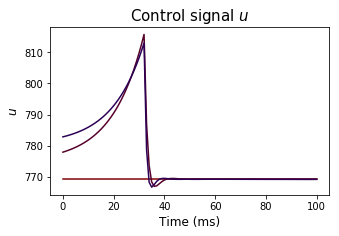

In [27]:
plot_signal(a, 500, 1000, t_T, t_R, 0.001) #10000

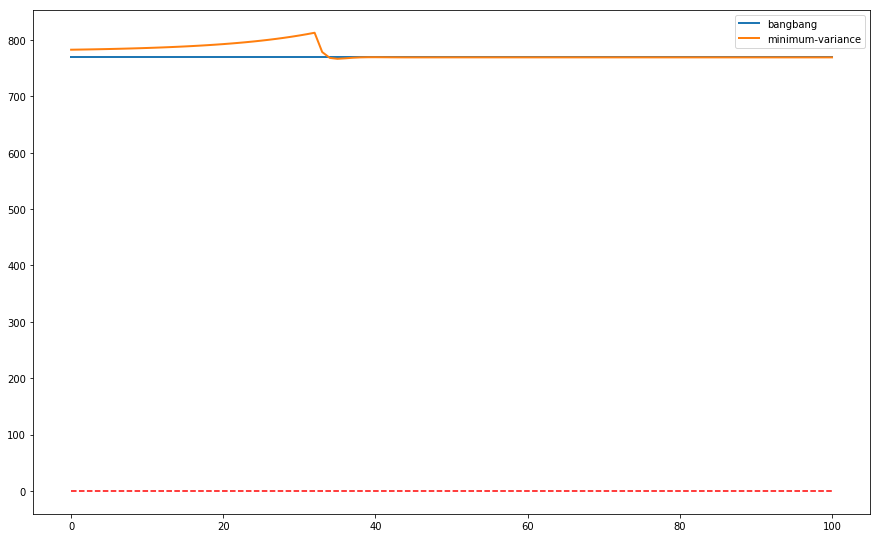

In [28]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(time_ms, a[0], lw=2, label="bangbang")
ax.plot(time_ms, a[niter], lw=2, label="minimum-variance")
ax.plot([0,(t_T+t_R)*1000],[0,0],'r--')
ax.legend()

In [29]:
position = np.zeros((niter+1,T+R+1))
velocity = np.zeros((niter+1,T+R+1))

for i in np.arange(niter+1):
    for j in np.arange(T+R+1):
        mean = expectation(a[i,:], j)
        position[i,j] = mean[0]
        velocity[i,j] = mean[1]

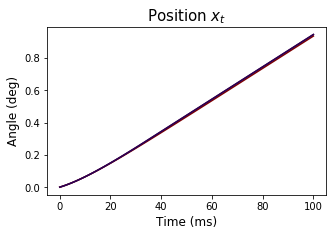

In [30]:
plot_position(position, 500, 1000, t_T, t_R, 0.001) #10000

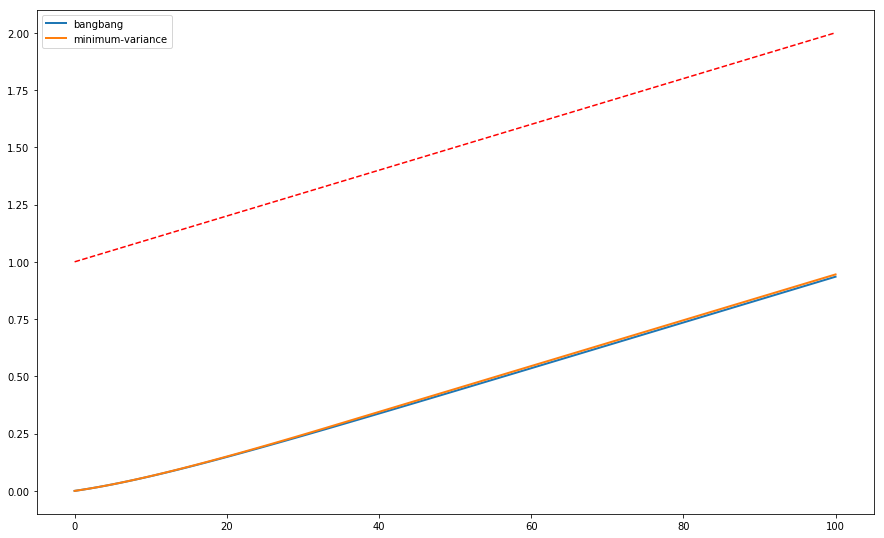

In [31]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(time_ms, position[0], lw=2, label="bangbang")
ax.plot(time_ms, position[niter], lw=2, label="minimum-variance")
ax.plot(np.linspace(0,(t_T+t_R)*1000,T+R+1), xx,'r--')

ax.legend()


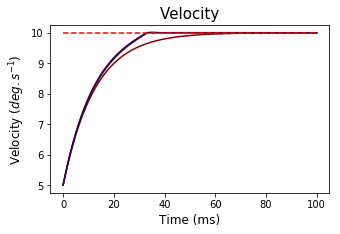

In [32]:
plot_velocity(velocity, 500, 1000, t_T, t_R, 0.001) # 10000

plt.plot(time_ms, vv,'r--')

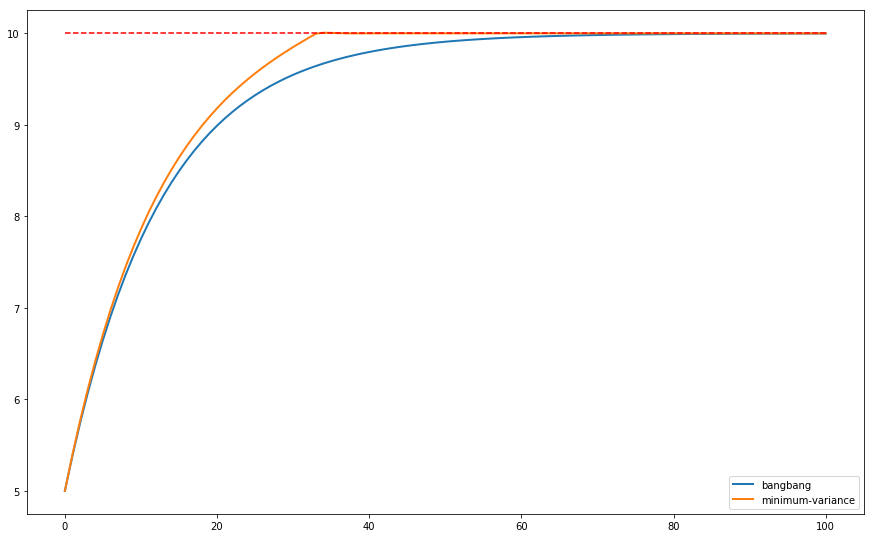

In [33]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(time_ms, velocity[0], lw=2, label="bangbang")
ax.plot(time_ms, velocity[niter], lw=2, label="minimum-variance")
ax.plot(np.linspace(0,(t_T+t_R)*1000,T+R+1), vv,'r--')
ax.legend()

In [34]:
variancev = np.zeros((niter+1,T+R+1))

for i in np.arange(niter+1):
    for j in np.arange(T+R+1):
        variancev[i,j] = variance(a[i,:], j)

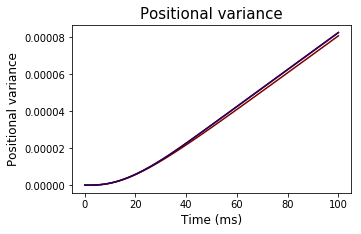

In [35]:
plot_variance(variancev, 250, 500, t_T, t_R, 0.001) # 5000

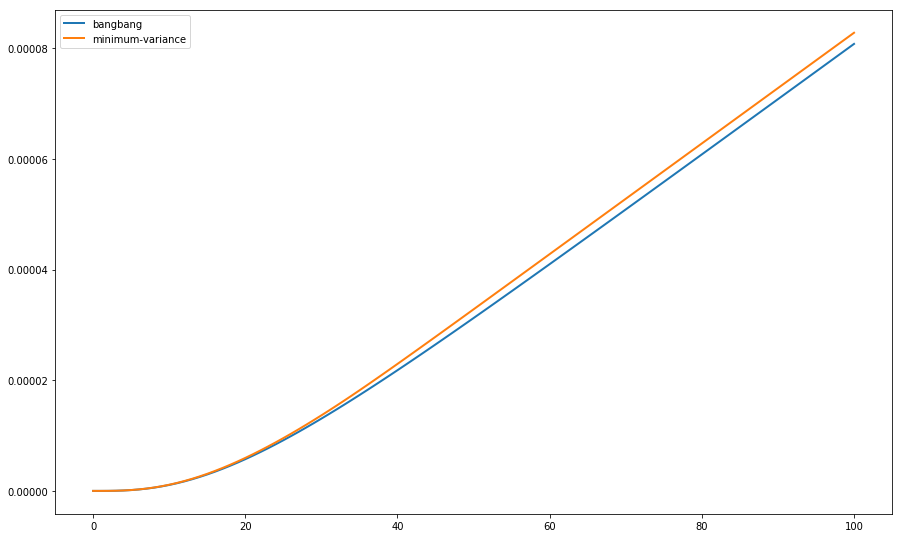

In [36]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(time_ms, variancev[0], lw=2, label="bangbang")
ax.plot(time_ms, variancev[niter], lw=2, label="minimum-variance")
ax.legend()

In [37]:
vel = np.zeros((8,T+R+1))

In [38]:
pos = np.zeros((8,T+R+1))

In [39]:
vel[7,:] = velocity[niter]

In [40]:
pos[7,:] = position[niter]

In [41]:
# with pickle save the previous records for different parameters

In [76]:
def SymmetricalBangbang(tau, x0, xT, dt, t_T, t_R, v0):
    """
    Returns the symmetrical (U+ = - U-) bangbang solution
    """
    T = int(t_T/dt)
    R = int(t_R/dt)
    time = np.linspace(0, t_T+t_R, R+T+1)

    if v0==0.:
        vrho = np.linspace(0.5,1,1000001)
        y = (xT-x0[0]-x0[1]*vrho*t_T)*(2-np.exp(-vrho*t_T/tau) - np.exp((1-vrho)*t_T/tau)) + x0[1]*((2*vrho-1)*t_T-tau*(2-np.exp(-vrho*t_T/tau)-np.exp((1-vrho)*t_T/tau)))

        rho = vrho[np.argmin(np.abs(y))]
        rhoT = int(np.round(T*rho))

        Umax = 1/tau*(xT-x0[0]-x0[1]*rho*t_T)/((2*rho-1)*t_T-tau*(2-np.exp(-rho*t_T/tau)-np.exp((1-rho)*t_T/tau)))

        xx = np.concatenate((Umax*tau*(time[0:rhoT]-tau*(1-np.exp(-time[0:rhoT]/tau)))+x0[1]*time[0:rhoT]+x0[0],
                                 xT+Umax*tau*(t_T-time[rhoT:T]+tau*(1-np.exp((t_T-time[rhoT:T])/tau))),
                                 xT*np.ones(R+1)))

        vv = np.concatenate((Umax*tau*(1-np.exp(-time[0:rhoT]/tau))+x0[1],
                                 -Umax*tau*(1-np.exp((t_T-time[rhoT:T])/tau)),
                                 np.zeros(R+1)))

        uu = np.concatenate((Umax*np.ones(rhoT),
                                 -Umax*np.ones(T-rhoT),
                                 np.zeros(R+1)))

        return uu, xx, vv

    else:
        vrho = np.linspace(0.5,1,1000001)
        y = (xT+v0*t_T-x0[0]-x0[1]*vrho*t_T + v0*tau*(1-np.exp((1-vrho)*t_T/tau))) * (2-np.exp(-vrho*t_T/tau) - np.exp((1-vrho)*t_T/tau)) - (v0*np.exp((1-vrho)*t_T/tau)-x0[1]) * ((2*vrho-1)*t_T-tau*(2-np.exp(-vrho*t_T/tau)-np.exp((1-vrho)*t_T/tau)))

        rho_pursuit = vrho[np.argmin(np.abs(y))]
        rhoT_pursuit = int(np.round(T*rho_pursuit))

        Umax_pursuit = 1/tau*(v0*np.exp((1-rho_pursuit)*t_T/tau)-x0[1])/(2-np.exp((1-rho_pursuit)*t_T/tau)-np.exp(-rho_pursuit*t_T/tau))

        x_pursuit = np.concatenate((Umax_pursuit*tau*(time[0:rhoT_pursuit]-tau*(1-np.exp(-time[0:rhoT_pursuit]/tau)))+x0[1]*time[0:rhoT_pursuit]+x0[0],
                                        xT+v0*t_T+Umax_pursuit*tau*(t_T-time[rhoT_pursuit:T]+tau*(1-np.exp((t_T-time[rhoT_pursuit:T])/tau)))+tau*v0*(1-np.exp((t_T-time[rhoT_pursuit:T])/tau)),
                                        xT+v0*t_T+v0*(time[T:(T+R+1)]-t_T)))

        v_pursuit = np.concatenate((Umax_pursuit*tau*(1-np.exp(-time[0:rhoT_pursuit]/tau))+x0[1],
                                        -Umax_pursuit*tau*(1-np.exp((t_T-time[rhoT_pursuit:T])/tau))+v0*np.exp((t_T-time[rhoT_pursuit:T])/tau),
                                        v0*np.ones(R+1)))

        u_pursuit = np.concatenate((Umax_pursuit*np.ones(rhoT_pursuit),
                                        -Umax_pursuit*np.ones(T-rhoT_pursuit),
                                        1/tau*v0*np.ones(R+1)))

        return u_pursuit, x_pursuit, v_pursuit


def vvariance(u):
    """
    vectorized version of variance
    """
    var = np.zeros(T+R+1)
    for i in np.arange(T+R+1):
        var[i] = variance(u,i)
    return var


def vexpectation(u):
    """
    vectorized version of expectation
    """
    exp = np.zeros((T+R+1, 2))
    for i in np.arange(T+R+1):
        exp[i, :] = expectation(u,i)
    return exp


In [77]:
def AsymmetricalBangbang(tau, x0, xT, dt2, t_T, t_R, v0):
    """
    Returns the asymmetrical (U+ =/= - U-) bangbang solution
    """
    T2 = int(t_T/dt2)
    R2 = int(t_R/dt2)
    time = np.linspace(0, t_T+t_R, R2+T2+1)

    A2 = np.array([[1, dt2], [0, 1-dt2/tau]])
    B2 = np.array([0., dt2])

    def A2_pow(A):
        """
        compute the array of A^i of shape (T+R+1, 2, 2)
        """
        A2_pow_array = np.zeros((T2+R2+1, 2, 2))
        for i in np.arange(T2+R2+1):
            A2_pow_array[i, :, :] = power(A, i)
        return A2_pow_array

    A2_pow_array = A2_pow(A2)

    def pow_fast2(n):
        return A2_pow_array[n,:,:]

    ci0_array2 = np.zeros(T2+R2+1)
    ci1_array2 = np.zeros(T2+R2+1)

    for i in np.arange(T2+R2+1):
        ci0_array2[i] = (A2_pow_array[i, :, :].dot(B2))[0]
        ci1_array2[i] = (A2_pow_array[i, :, :].dot(B2))[1]

    ci_array2 = np.array([ci0_array2, ci1_array2])


    def expectation2(u, t):
        """
        compute the expectation at time t given the control signal u

        array of shape (2, 1)
                """
        if t == 0:
            return x0
        else:
            return pow_fast2(t).dot(x0)+(ci_array2[:,0:t]*np.flipud(u[0:t])).sum(axis = 1)

    def variance2(u, t):
        """
        compute the variance at time t given the control signal u
        """
        return k*(np.flipud(ci0_array2[0:t]**2)*u[0:t]**2).sum()


    n = 100 # number of rho's values
    rho = np.linspace(0.5,0.999,n) # rho's tested values


    Umoins = 1/tau*((xT-x0[0]+v0*(t_T+tau)-x0[1]*(rho*t_T+tau)) * (1-np.exp(-rho*t_T/tau)) - rho*t_T*(v0*np.exp((1-rho)*t_T/tau) - x0[1]))/(t_T-(1-rho)*t_T*np.exp(-rho*t_T/tau)-rho*t_T*np.exp((1-rho)*t_T/tau))

    Uplus = (1-np.exp((1-rho)*t_T/tau))/(1-np.exp(-rho*t_T/tau))*Umoins+1/tau*(v0*np.exp((1-rho)*t_T/tau)-x0[1])/(1-np.exp(-rho*t_T/tau))

    u = np.zeros((n-2, T2+R2+1))

    for i in np.arange(n-2):
        rhoT = int(T2*rho[i])
        u[i,:] = np.concatenate((Uplus[i]*np.ones(rhoT), Umoins[i]*np.ones(T2-rhoT), 1/tau*v0*np.ones(R2+1)))


    position = np.zeros((n-2, T2+R2+1))
    velocity = np.zeros((n-2, T2+R2+1))

    for i in np.arange(n-2):
        for j in np.arange(T2+R2+1):
            mean = expectation2(u[i,:], j)
            position[i,j] = mean[0]
            velocity[i,j] = mean[1]


    variancev = np.zeros((n-2, T2+R2+1))

    for i in np.arange(n-2):
        for j in np.arange(T2+R2+1):
            variancev[i,j] = variance2(u[i,:], j)


    somme = np.zeros(n-2)
    for i in np.arange(n-2):
        for j in T2+np.arange(R2+1):
            somme[i] += variancev[i,j]

    ind_best = np.argmin(somme)
    rho = rho[ind_best]

    Umoins = 1/tau*((xT-x0[0]+v0*(t_T+tau)-x0[1]*(rho*t_T+tau)) * (1-np.exp(-rho*t_T/tau)) - rho*t_T*(v0*np.exp((1-rho)*t_T/tau) - x0[1])) / (t_T-(1-rho)*t_T*np.exp(-rho*t_T/tau)-rho*t_T*np.exp((1-rho)*t_T/tau))

    Uplus = (1-np.exp((1-rho)*t_T/tau)) / (1-np.exp(-rho*t_T/tau)) * Umoins+1/tau * (v0*np.exp((1-rho)*t_T/tau)-x0[1]) / (1-np.exp(-rho*t_T/tau))

    rhoT = int(T2*rho)

    position[ind_best,0:rhoT] = tau*Uplus*(time[0:rhoT]-tau*(1-np.exp(-time[0:rhoT]/tau)))+x0[1]*time[0:rhoT]+x0[0]
    position[ind_best,rhoT:T2] = xT+v0*t_T+v0*tau*(1-np.exp((t_T-time[rhoT:T2])/tau))-tau*Umoins*(t_T-time[rhoT:T2]+tau*(1-np.exp((t_T-time[rhoT:T2])/tau)))
    position[ind_best,T2:(T2+R2+1)] = xT+v0*t_T+v0*(time[T2:(T2+R2+1)]-t_T)


    velocity[ind_best,0:rhoT] = tau*Uplus*(1-np.exp(-time[0:rhoT]/tau))+x0[1]
    velocity[ind_best,rhoT:T2] = v0*np.exp((t_T-time[rhoT:T2])/tau)+tau*Umoins*(1-np.exp((t_T-time[rhoT:T2])/tau))
    velocity[ind_best,T2:(T2+R2+1)] = v0*np.ones(R2+1)


    return u[ind_best, :], position[ind_best, :], velocity[ind_best, :], variancev[ind_best, :]*dt/dt2


In [78]:
### retrieve the files (for the cells are long to run in GeneralCoordinates. pynb) ### 


def record_pickle():
    n_iter = 1000
    record_each = 100
    control_init = None
    # First : test if the file already exists which mean that the function has already been used for this parameters
    import pickle
    import os
    from os.path import isfile

    # if the file exists we use it
    if os.path.isfile('/media/ana/Doc & softwares/Users/Lessons/Master Marseille/M2 (2017-2018)/Internship M2a/OptimalPrecision/DataRecording'+'dt_'+str(dt)+'/'+'HW_tau='+str(tau)+'_dt='+str(dt)+'_tT='+str(t_T)+'_tR='+str(t_R)+'_k='+str(k)+'_niter='+str(n_iter)+'_xT='+str(xT[0])+'_v='+str(v)+'.pkl'):
        import pandas as pd
        record = pd.read_pickle('/media/ana/Doc & softwares/Users/Lessons/Master Marseille/M2 (2017-2018)/Internship M2a/OptimalPrecision/DataRecording'+'dt_'+str(dt)+'/'+'HW_tau='+str(tau)+'_dt='+str(dt)+'_tT='+str(t_T)+'_tR='+str(t_R)+'_k='+str(k)+'_niter='+str(n_iter)+'_xT='+str(xT[0])+'_v='+str(v)+'.pkl')
        control = record.signal[n_iter]

        # We compute the sym bangbang to have nice plots (that's why the time step is reduced)
        control_bang1, pos_bang1, vel_bang1 = SymmetricalBangbang(tau, x0, xT[0], 0.0000001, t_T, t_R, v)

        # useful to compute the variance
        control_bang1bis, pos_bang1bis, vel_bang1bis = SymmetricalBangbang(tau, x0, xT[0], dt, t_T, t_R, v)

        var_bang1 = vvariance(control_bang1bis)


        bang_data = pd.DataFrame([{'signal':control_bang1,
                                   'position':pos_bang1,
                                   'velocity':vel_bang1,
                                   'variance':var_bang1}],
                                   index=[0])

        # We compute the asym bangbang to have nice plots (that's why the time step is reduced)
        control_bang2, pos_bang2, vel_bang2, var_bang2 = AsymmetricalBangbang(tau, x0, xT[0], 0.00001, t_T, t_R, v)

        bang_data2 = pd.DataFrame([{'signal':control_bang2,
                                   'position':pos_bang2,
                                   'velocity':vel_bang2,
                                   'variance':var_bang2}],
                                   index=[1])

        bang_data = pd.concat([bang_data, bang_data2])
        return control, record, bang_data, t_T, t_R

    # if not, we start from zero
    else:

        if record_each>0:
            import pandas as pd
            record = pd.DataFrame()

        # if the initial control is given by the inputs, we use it
        if not (control_init is None):
            control = control_init.copy()

        # if not, we start from a constant signal (faster than starting from a bangbang)
        else:
            control = np.ones(T+R+1)*v/tau

        # We compute the sym bangbang to have nice plots (that's why the time step is reduced)
        control_bang1, pos_bang1, vel_bang1 = SymmetricalBangbang(tau, x0, xT[0], 0.0000001, t_T, t_R, v)

        # useful to compute the variance
        control_bang1bis, pos_bang1bis, vel_bang1bis = SymmetricalBangbang(tau, x0, xT[0], dt, t_T, t_R, v)

        var_bang1 = vvariance(control_bang1bis)


        bang_data = pd.DataFrame([{'signal':control_bang1,
                                   'position':pos_bang1,
                                   'velocity':vel_bang1,
                                   'variance':var_bang1}],
                                   index=[0])

        # We compute the asym bangbang to have nice plots (that's why the time step is reduced)
        control_bang2, pos_bang2, vel_bang2, var_bang2 = AsymmetricalBangbang(tau, x0, xT[0], 0.00001, t_T, t_R, v)

        bang_data2 = pd.DataFrame([{'signal':control_bang2,
                                   'position':pos_bang2,
                                   'velocity':vel_bang2,
                                   'variance':var_bang2}],
                                   index=[1])

        bang_data = pd.concat([bang_data, bang_data2])



        control[T+R] = 1/tau*v


        cost_iter = np.zeros(0)
        posT_iter = np.zeros(0)

        for i_iter in np.arange(n_iter):

            # Gradient descent
            control_old = control.copy()
            control[0:T+R] = control_old[0:T+R] - eta*np.array([cost_deriv(control_old, i) for i in np.arange(T+R)])
            cost_iter = np.concatenate((cost_iter, np.array([cost(control_old)])))
            posT_iter = np.concatenate((posT_iter, np.array([expectation(control_old, T)[0]])))

            if record_each>0:
                if i_iter % int(record_each) == 0:
                    control_rec = control_old.copy()
                    pos_rec = vexpectation(control_old)[:, 0]
                    vel_rec = vexpectation(control_old)[:, 1]
                    var_rec = vvariance(control_old)
                    cost_rec = cost_iter.copy()
                    cost_iter = np.zeros(0)
                    posT_rec = posT_iter.copy()
                    posT_iter = np.zeros(0)


                    record_one = pd.DataFrame([{'signal':control_rec,
                                                'position':pos_rec,
                                                'velocity':vel_rec,
                                                'variance':var_rec,
                                                'cost':cost_rec,
                                                'positionT':posT_rec}],
                                                index=[i_iter])
                    record = pd.concat([record, record_one])

        record_last = pd.DataFrame([{'signal':control,
                                     'position':vexpectation(control)[:, 0],
                                     'velocity':vexpectation(control)[:, 1],
                                     'variance':vvariance(control),
                                     'cost':cost_iter,
                                     'positionT':posT_iter}],
                                     index=[n_iter])

        record = pd.concat([record, record_last])

    # '/home/baptiste/Documents/2017_OptimalPrecision' = '.'
    # import os
    # fname = os.path.join('DataRecording', 'machin', 'truc') 
        record.to_pickle('/media/ana/Doc & softwares/Users/Lessons/Master Marseille/M2 (2017-2018)/Internship M2a/OptimalPrecision/DataRecording'+'dt_'+str(dt)+'/'+'HW_tau='+str(tau)+'_dt='+str(dt)+'_tT='+str(t_T)+'_tR='+str(t_R)+'_k='+str(k)+'_niter='+str(n_iter)+'_xT='+str(xT[0])+'_v='+str(v)+'.pkl')

        if record_each==0:
            return control, bang_data, t_T, t_R
        else:
            return control, record, bang_data, t_T, t_R

In [79]:
record_pickle()

FileNotFoundError: [Errno 2] No such file or directory: '/media/ana/Doc & softwares/Users/Lessons/Master Marseille/M2 (2017-2018)/Internship M2a/OptimalPrecision/DataRecordingdt_0.001/HW_tau=0.013_dt=0.001_tT=0.033_tR=0.067_k=0.01_niter=1000_xT=0.5_v=10.pkl'

In [82]:
import numpy as np

import pickle
import pandas as pd
record = pd.DataFrame()
for i in np.arange(8):
    record_one = pd.DataFrame([{'position':pos[i,:],'velocity':vel[i,:]}],index=[i])
    record = pd.concat([record, record_one])
record.to_pickle('/media/ana/Doc & softwares/Users/Lessons/Master Marseille/M2 (2017-2018)/Internship M2a/OptimalPrecision/DataRecording' + 'HarrisWolpertPursuit_dt=0.001_tau=0.013_data_for_main_sequence.pkl')

In [83]:
import pickle
import pandas as pd
record = pd.read_pickle('/media/ana/Doc & softwares/Users/Lessons/Master Marseille/M2 (2017-2018)/Internship M2a/OptimalPrecision/DataRecording' + 'HarrisWolpertPursuit_dt=0.002_beta=100_m=1_cosinus.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '/media/ana/Doc & softwares/Users/Lessons/Master Marseille/M2 (2017-2018)/Internship M2a/OptimalPrecision/DataRecordingHarrisWolpertPursuit_dt=0.002_beta=100_m=1_cosinus.pkl'

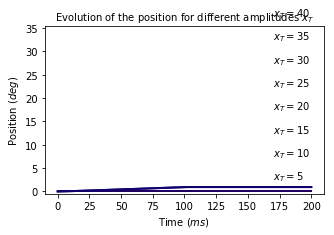

In [84]:
%run PlotFunctions.py

col = np.zeros((8,3))
for i in np.arange(8):
    col[i] = (8-i)/(2*8),0,i/(2*8)

fig_width = 5
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
#plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record_position[0],np.ones(100)*record_position[0][T+R])), color = col[0], lw = 2)
#plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record_position[1],np.ones(100)*record_position[1][T+R])), color = col[1], lw = 2)
#plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record_position[2],np.ones(100)*record_position[2][T+R])), color = col[2], lw = 2)
#plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record_position[3],np.ones(100)*record_position[3][T+R])), color = col[3], lw = 2)
#plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record_position[4],np.ones(100)*record_position[4][T+R])), color = col[4], lw = 2)
#plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record_position[5],np.ones(100)*record_position[5][T+R])), color = col[5], lw = 2)
#plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record_position[6],np.ones(100)*record_position[6][T+R])), color = col[6], lw = 2)
#plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record_position[7],np.ones(100)*record_position[7][T+R])), color = col[7], lw = 2)

for i in range(8):
    ax.plot(np.linspace(0, 200, 2*T+2*R+1), 
            np.concatenate((record.position[i],np.ones(100)*record.position[i][T+R])), 
            color = col[i], lw = 2)


plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.position[0],np.ones(100)*record.position[0][T+R])), color = col[0], lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.position[1],np.ones(100)*record.position[1][T+R])), color = col[1], lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.position[2],np.ones(100)*record.position[2][T+R])), color = col[2], lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.position[3],np.ones(100)*record.position[3][T+R])), color = col[3], lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.position[4],np.ones(100)*record.position[4][T+R])), color = col[4], lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.position[5],np.ones(100)*record.position[5][T+R])), color = col[5], lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.position[6],np.ones(100)*record.position[6][T+R])), color = col[6], lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.position[7],np.ones(100)*record.position[7][T+R])), color = col[7], lw = 2)

#ax.plot(np.linspace(0,2*(t_T+t_R)*1000,2*T+2*R+1), np.ones(2*T+2*R+1)*target[0],'r--')
#ax.plot(np.linspace(0,2*(t_T+t_R)*1000,2*T+2*R+1), np.ones(2*T+2*R+1)*target[1],'r--')
#ax.plot(np.linspace(0,2*(t_T+t_R)*1000,2*T+2*R+1), np.ones(2*T+2*R+1)*target[2],'r--')
#ax.plot(np.linspace(0,2*(t_T+t_R)*1000,2*T+2*R+1), np.ones(2*T+2*R+1)*target[3],'r--')
#ax.plot(np.linspace(0,2*(t_T+t_R)*1000,2*T+2*R+1), np.ones(2*T+2*R+1)*target[4],'r--')
#ax.plot(np.linspace(0,2*(t_T+t_R)*1000,2*T+2*R+1), np.ones(2*T+2*R+1)*target[5],'r--')
#ax.plot(np.linspace(0,2*(t_T+t_R)*1000,2*T+2*R+1), np.ones(2*T+2*R+1)*target[6],'r--')
#ax.plot(np.linspace(0,2*(t_T+t_R)*1000,2*T+2*R+1), np.ones(2*T+2*R+1)*target[7],'r--')
plt.text(170, 2.5, r'$x_T = 5$', fontsize = 10)
plt.text(170, 7.5, r'$x_T = 10$', fontsize = 10)
plt.text(170, 12.5, r'$x_T = 15$', fontsize = 10)
plt.text(170, 17.5, r'$x_T = 20$', fontsize = 10)
plt.text(170, 22.5, r'$x_T = 25$', fontsize = 10)
plt.text(170, 27.5, r'$x_T = 30$', fontsize = 10)
plt.text(170, 32.5, r'$x_T = 35$', fontsize = 10)
plt.text(170, 37.5, r'$x_T = 40$', fontsize = 10)


ax.set_ylim(-0.5, target[7]+0.5)

ax.set_title(r'Evolution of the position for different amplitudes $x_T$', fontsize = 10)
ax.set_xlabel('Time ($ms$)', fontsize=10)
ax.set_ylabel(r'Position ($deg$)', fontsize=10)
plt.savefig('diffamplitudepos.png')

Text(0,0.5,'Velocity ($deg\\cdot s^{-1}$)')

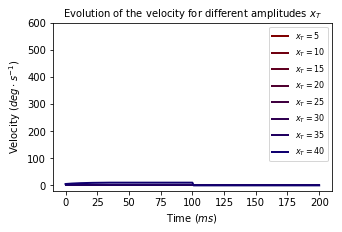

In [85]:
col = np.zeros((8,3))
for i in np.arange(8):
    col[i] = (8-i)/(2*8),0,i/(2*8)

fig_width = 5
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.velocity[0],np.zeros(100))), color = col[0], label= r'$x_T = 5$', lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.velocity[1],np.zeros(100))), color = col[1], label= r'$x_T = 10$', lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.velocity[2],np.zeros(100))), color = col[2], label= r'$x_T = 15$', lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.velocity[3],np.zeros(100))), color = col[3], label= r'$x_T = 20$', lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.velocity[4],np.zeros(100))), color = col[4], label= r'$x_T = 25$', lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.velocity[5],np.zeros(100))), color = col[5], label= r'$x_T = 30$', lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.velocity[6],np.zeros(100))), color = col[6], label= r'$x_T = 35$', lw = 2)
plt.plot(np.linspace(0,200,2*T+2*R+1), np.concatenate((record.velocity[7],np.zeros(100))), color = col[7], label= r'$x_T = 40$', lw = 2)

ax.legend(prop={'size':8})


ax.set_ylim(-20, 600)

ax.set_title(r'Evolution of the velocity for different amplitudes $x_T$', fontsize = 10)
ax.set_xlabel('Time ($ms$)', fontsize=10)
ax.set_ylabel(r'Velocity ($deg\cdot s^{-1}$)', fontsize=10)



In [86]:
peak_vel = np.array([max(record.velocity[0]),max(record.velocity[1]),max(record.velocity[2]),max(record.velocity[3]),max(record.velocity[4]),max(record.velocity[5]),max(record.velocity[6]),max(record.velocity[7])])

In [87]:
alpha = (np.sqrt(np.concatenate((np.zeros(1),target)))*np.concatenate((np.zeros(1),peak_vel))).sum()/((np.concatenate((np.zeros(1),target))).sum())

ValueError: operands could not be broadcast together with shapes (10,) (9,) 

ValueError: x and y must have same first dimension, but have shapes (10,) and (9,)

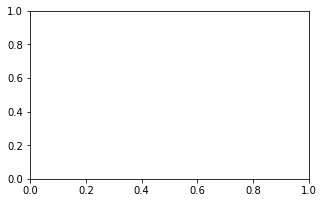

In [88]:
fig_width = 5
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
plt.plot(np.concatenate((np.zeros(1),target)), np.concatenate((np.zeros(1),peak_vel)),lw = 2)
ax.set_ylim(-20, 600)

ax.set_title('Main sequence diagram', fontsize = 12)
ax.set_xlabel('Amplitude ($deg$)', fontsize=10)
ax.set_ylabel(r'Peak velocity ($deg\cdot s^{-1}$)', fontsize=10)

In [89]:
alpha

NameError: name 'alpha' is not defined

In [54]:
cost_p = np.zeros(niter+1)

for i in np.arange(niter+1):
    cost_p[i] = cost(a[i])

Text(0,0.5,'Cost')

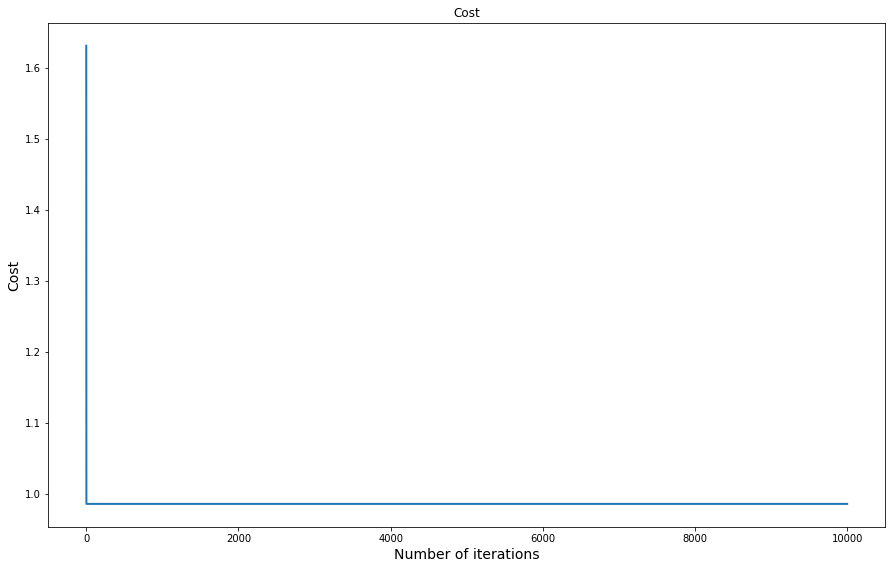

In [55]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(cost_p, '-', lw = 2)
ax.set_title('Cost')
ax.set_xlabel('Number of iterations', fontsize=14)
ax.set_ylabel('Cost', fontsize=14)


Finally, we trace the position at time T for each iteration.

In [56]:
positionT = np.zeros(niter+1)

for i in np.arange(niter+1):
    positionT[i] = (expectation(a[i], T))[0]

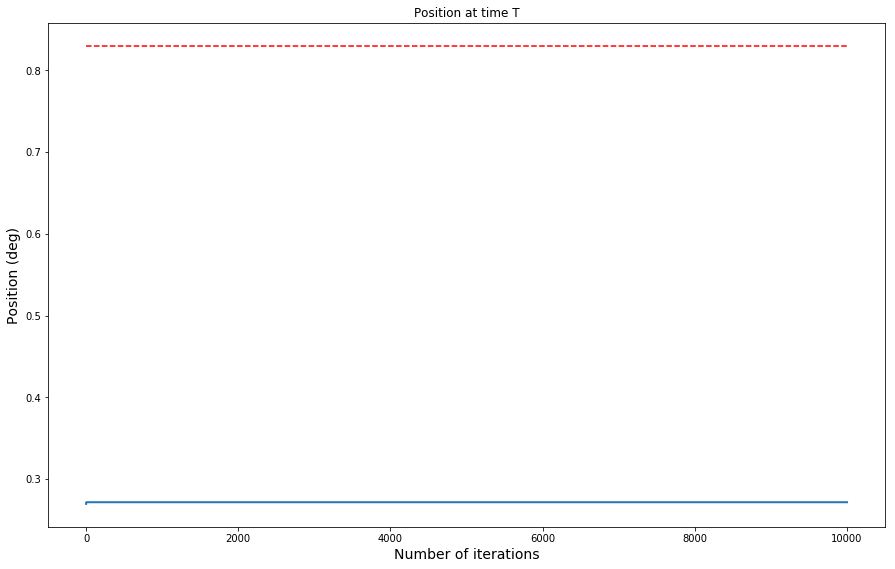

In [57]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(positionT, '-', lw=2)
ax.set_title('Position at time T')
ax.set_xlabel('Number of iterations', fontsize=14)
ax.set_ylabel('Position (deg)', fontsize=14)
ax.plot([0,niter],[xT[0]+v*t_T ,xT[0]+v*t_T],'r--')


In [4]:
import numpy as np

import pickle
import pandas as pd
record = pd.DataFrame()
for i in np.arange(8):
    record_one = pd.DataFrame([{'position':pos[i,:],'velocity':vel[i,:]}],index=[i])
    record = pd.concat([record, record_one])
record.to_pickle('/media/ana/Doc & softwares/Users/Lessons/Master Marseille/M2 (2017-2018)/Internship M2a/OptimalPrecision/DataRecording' + 'HarrisWolpertPursuit_dt=0.001_tau=0.013_data_for_main_sequence.pkl')

NameError: name 'pos' is not defined

In [ ]:
import pickle
import pandas as pd
record = pd.read_pickle('/media/ana/Doc & softwares/Users/Lessons/Master Marseille/M2 (2017-2018)/Internship M2a/OptimalPrecision/DataRecording' + 'HarrisWolpertPursuit_dt=0.002_beta=100_m=1_cosinus.pkl')

In [ ]:
len(record_velocity[500])

In [ ]:
plot_signal(record_signal, 500, 10000, 0.1, 1.9, 0.002)

In [ ]:
plot_position(record_position, 500, 10000, 0.1, 1.9, 0.002)


In [ ]:
plot_velocity(record_velocity, 500, 10000, 0.1, 1.9, 0.002)
